# Análise exploratória dos atributos numéricos (Discretos de razão)

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(777)

df = pd.read_csv('../data/students.csv')

X = df.loc[:, df.columns != 'Target']
y = df['Target']

In [4]:
ratio = ['Age at enrollment',
         'Curricular units 1st sem (credited)',
         'Curricular units 1st sem (enrolled)',
         'Curricular units 1st sem (evaluations)',
         'Curricular units 1st sem (approved)',
         'Curricular units 1st sem (grade)',
         'Curricular units 1st sem (without evaluations)',
         'Curricular units 2nd sem (credited)',
         'Curricular units 2nd sem (enrolled)',
         'Curricular units 2nd sem (evaluations)',
         'Curricular units 2nd sem (approved)',
         'Curricular units 2nd sem (grade)',
         'Curricular units 2nd sem (without evaluations)',
         'Unemployment rate',
         'Inflation rate', 
         'GDP']

In [6]:
X_r = X[ratio]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y, train_size=0.8, stratify=y, random_state=777)

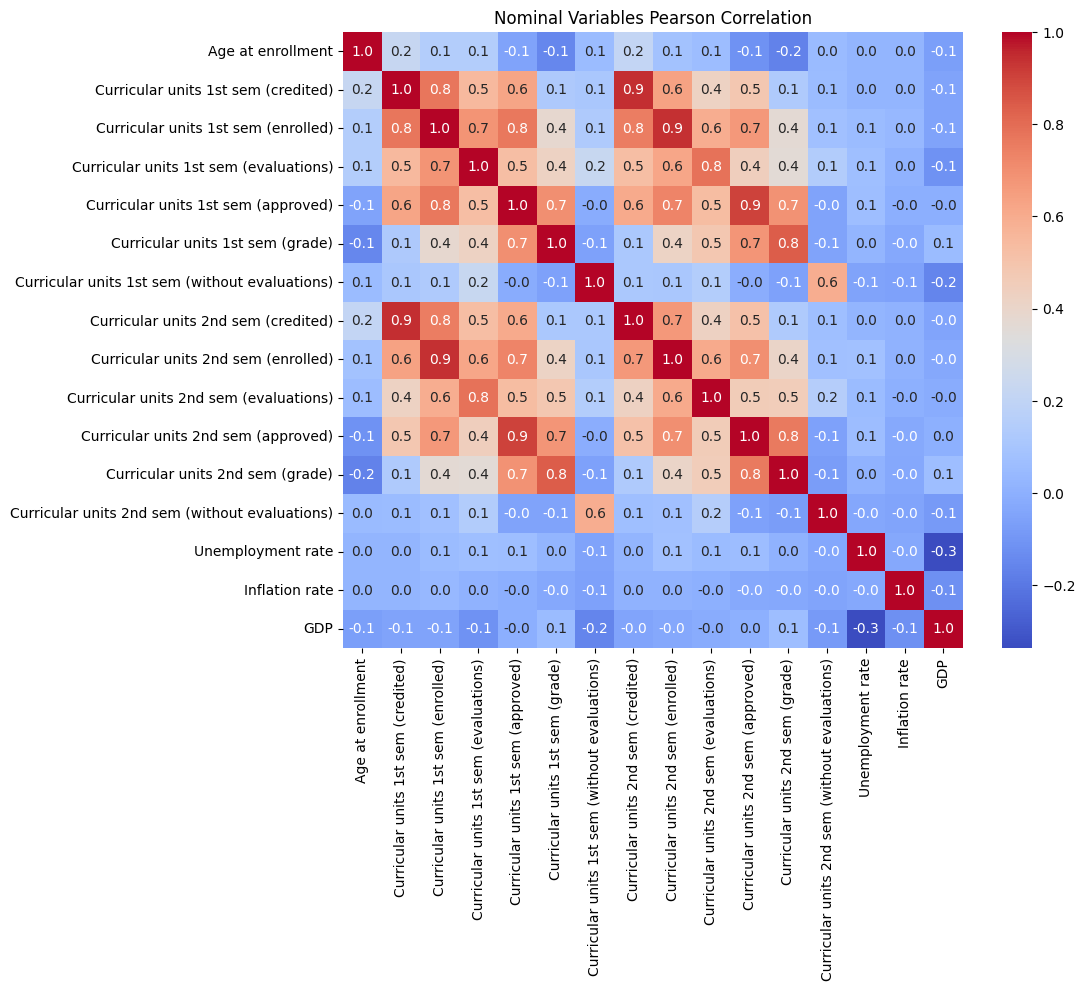

In [8]:
peason_corr = X_train.corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(peason_corr, annot=True, cmap='coolwarm', fmt='.1f')
plt.title('Nominal Variables Pearson Correlation')
plt.show()